# <u><center> <span style=" color:red; font-family: Arial; font-size:1.4em">       Predicting Booking Destination of New Users on AirBnb Dataset</span></center></u>

# <center> <span style="color:blue"> [ Author: Shreya Nair]</span></center>



In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://fortunedotcom.files.wordpress.com/2014/07/new-logos-airbnb.jpg")

In [2]:
# Draw inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [3]:
'''Define a variable that points to this. This will let you avoid typing
the long path everytime you need to use it'''

my_path = 'C:\\Users\\shrey\\Desktop\\6105MLproject\\MLproject'

In [4]:
train_users = pd.read_csv(f'{my_path}/train_users_2.csv')
test_users = pd.read_csv(f'{my_path}/test_users.csv')
sessions = pd.read_csv(f'{my_path}/sessions.csv')
countries = pd.read_csv(f'{my_path}/countries.csv')
age_gender = pd.read_csv(f'{my_path}/age_gender_bkts.csv')

In [5]:
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")
print("We have", sessions.shape[0], "Session Records for" , sessions.user_id.nunique() , "users." )
print("We have", (train_users.shape[0] + test_users.shape[0] -sessions.user_id.nunique()) , "users with no session records." )
print("We have", (countries.shape[0]) , "records in the countries dataset." )
print("We have", (age_gender.shape[0]) , "records in the age/gender dataset." )

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.
We have 1048575 Session Records for 15500 users.
We have 260047 users with no session records.
We have 10 records in the countries dataset.
We have 420 records in the age/gender dataset.


In [6]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Remove ID's since now we are not interested in making predictions
users.set_index('id',inplace=True)

users.head()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
id,,,,,,,,,,,,,,,
gxn3p5htnn,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
820tgsjxq7,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
4ft3gnwmtx,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
bjjt8pjhuk,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
87mebub9p4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [7]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [8]:
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [9]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


# <u>Missing Data </u>

Usually the missing data comes in the way of NaN, but in the data above above we can see that the gender column some values being -unknown-. We transformed those values into NaN first and then summarised the percentage of unknowns in each field.

In [10]:
users.gender.replace('-unknown-', np.nan, inplace=True)
users.first_browser.replace('-unknown-', np.nan, inplace=True)

In [11]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser              16.111226
gender                     46.990169
dtype: float64

We have quite a lot of NaN in the age and gender wich will yield in lesser performance of the classifiers we will build. The feature date_first_booking has a 67% of NaN values and this feature is not present for the tests users.

The other feature with a high rate of NaN was age.

In [12]:
print('Users with age greater than 85 : ' + str(sum(users.age > 85)))
print('Users with age less than 18 : ' + str(sum(users.age < 18)))

Users with age greater than 85 : 3041
Users with age less than 18 : 188


In [13]:
users[users.age > 85]['age'].describe()

count    3041.000000
mean      621.953963
std       847.508105
min        86.000000
25%       105.000000
50%       105.000000
75%      1953.000000
max      2014.000000
Name: age, dtype: float64

In [14]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [15]:
users.loc[users.age > 85, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan

## <u>Data Types</u>

In the next step we converted each feature as what they are. We transformed the date and categorical variables into the corresponding datatypes.

Categorical Data:

    affiliate_channel
    affiliate_provider
    country_destination
    first_affiliate_tracked
    first_browser
    first_device_type
    gender
    language
    signup_app
    signup_method

Date Date:

    date_account_created
    date_first_booking
    date_first_active


In [16]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [17]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')

# <u>Visualizing the Data</u>


## Gender

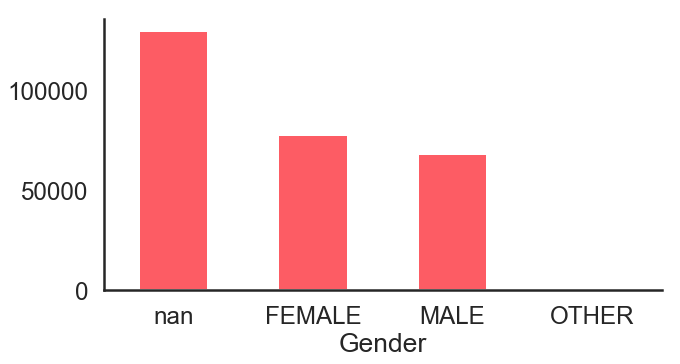

In [18]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0, figsize=(10,5))
plt.xlabel('Gender')
sns.despine()

The above plot helps us to visuvalize the amount of missing data for this feature. We can also notice that there is a slight difference in the counts between the user gender.

Next thing we looked at is to see if there is any gender preferences when travelling.As we can see in the plot there are no big differences between the 2 main genders.

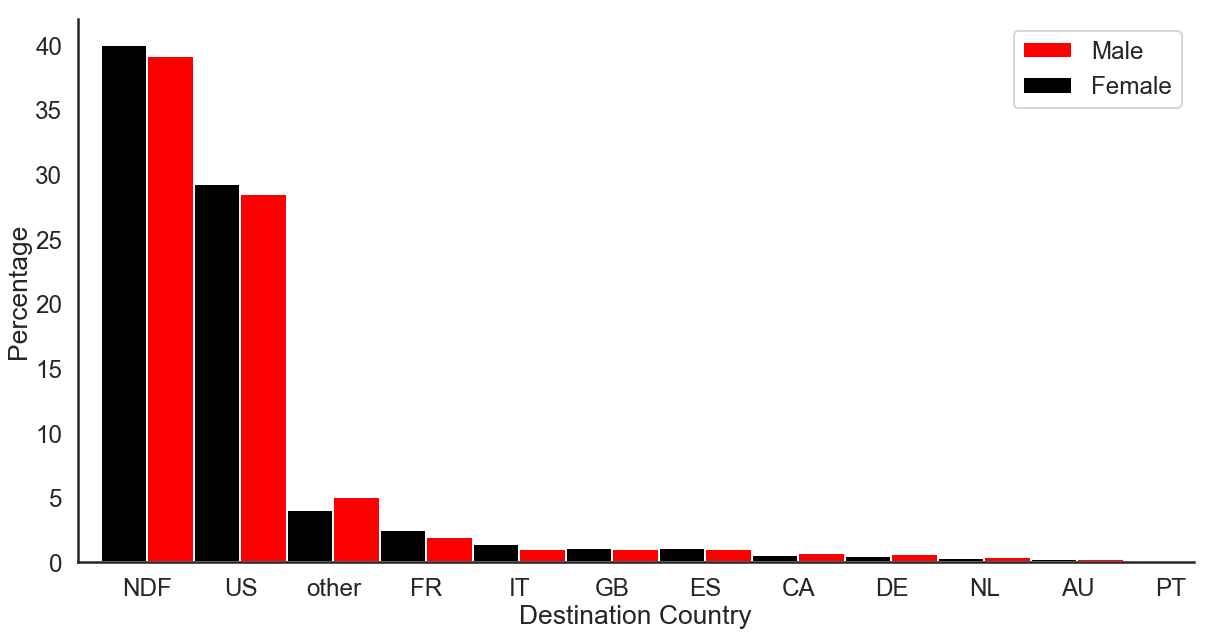

In [19]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.5

male_destinations.plot(kind='bar', width=width, color='red', position=0, label='Male', rot=0, figsize=(20, 10))
female_destinations.plot(kind='bar', width=width, color='black', position=1, label='Female', rot=0, figsize=(20, 10))

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()



## Country Destination

We plotted the counts of the country destination . As seen in the figure below nearly 60% of the customers end up not making a booking. Among the customers who do end up making a booking US is the preffered destination for more than 2/3 rd's.

Text(0, 0.5, 'Percentage')

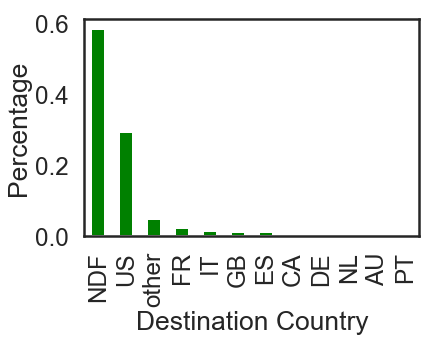

In [20]:
counts =  users.country_destination.value_counts(normalize=True).plot(kind='bar', color='green')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

## Age

The plot of the age data of the users in the traning and test data is as below.

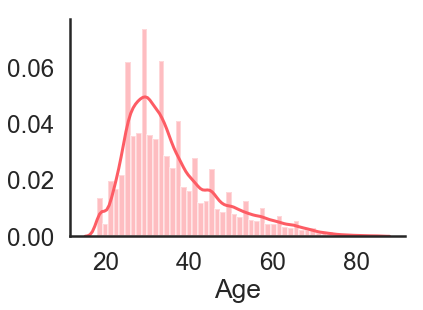

In [21]:
sns.distplot(users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

#### As we would expect, the common age to travel is between 25 and 40. We wanted to further explore if there is difference in the booking patterns based on the age of the users. We took a arbitratry split range of 50 and plotted the below graph .

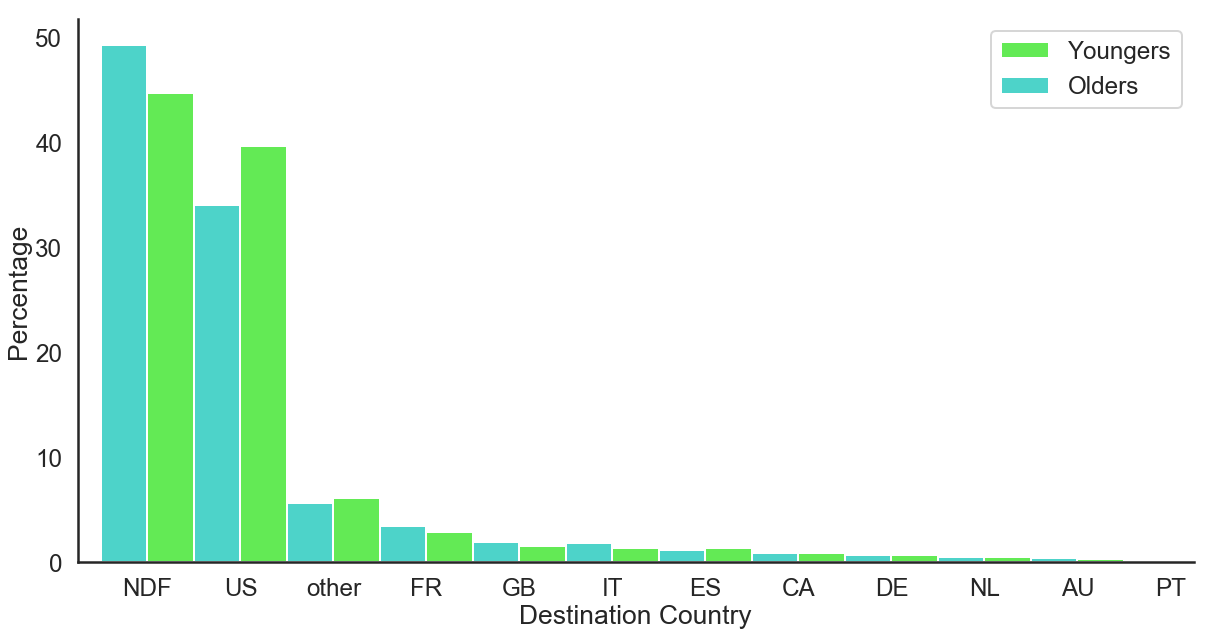

In [22]:

age = 50

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0, figsize=(20, 10))
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0, figsize=(20, 10) )

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

#### We can see that the young people tend to stay in the US, and the older people choose to travel outside the country.


## Language

We explore the language feature to understand the distribution and see it would make a good predictor for destination country.We can visuvalize below that language does capture variations in booking destination of the users. For example in the plot below for people with 'fr' language country destnation 'fr' is the second most preffered destination for first booking after 'US'.

Text(0, 0.5, 'Log(Count)')

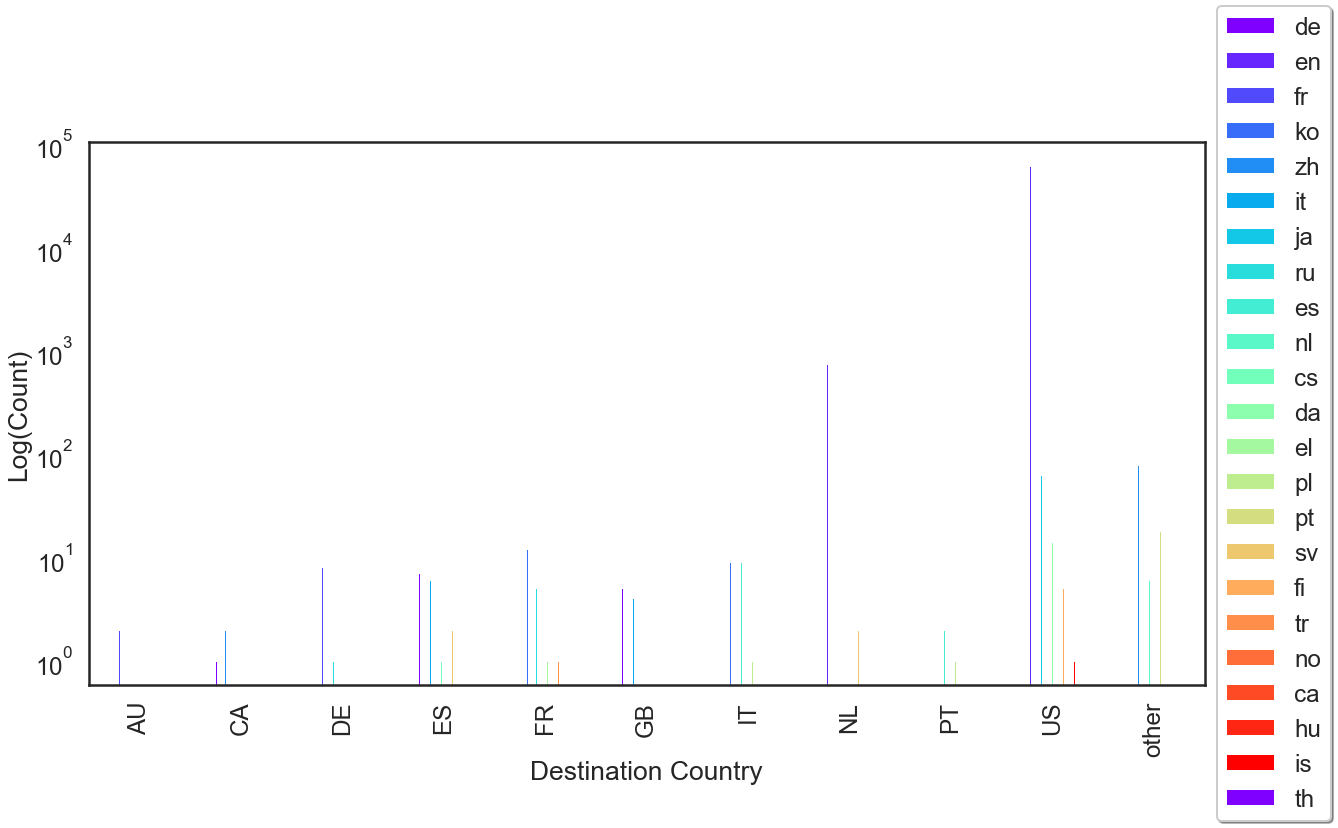

In [23]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0,1,22))
users[~(users['country_destination'].isin(['NDF']))].groupby(['country_destination' , 'language']).size().unstack().plot(kind='bar', figsize=(20,10),stacked=False,color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Destination Country')
plt.ylabel('Log(Count)')

# Dates

We next explore the date account created feature and plot the count of users created by date.

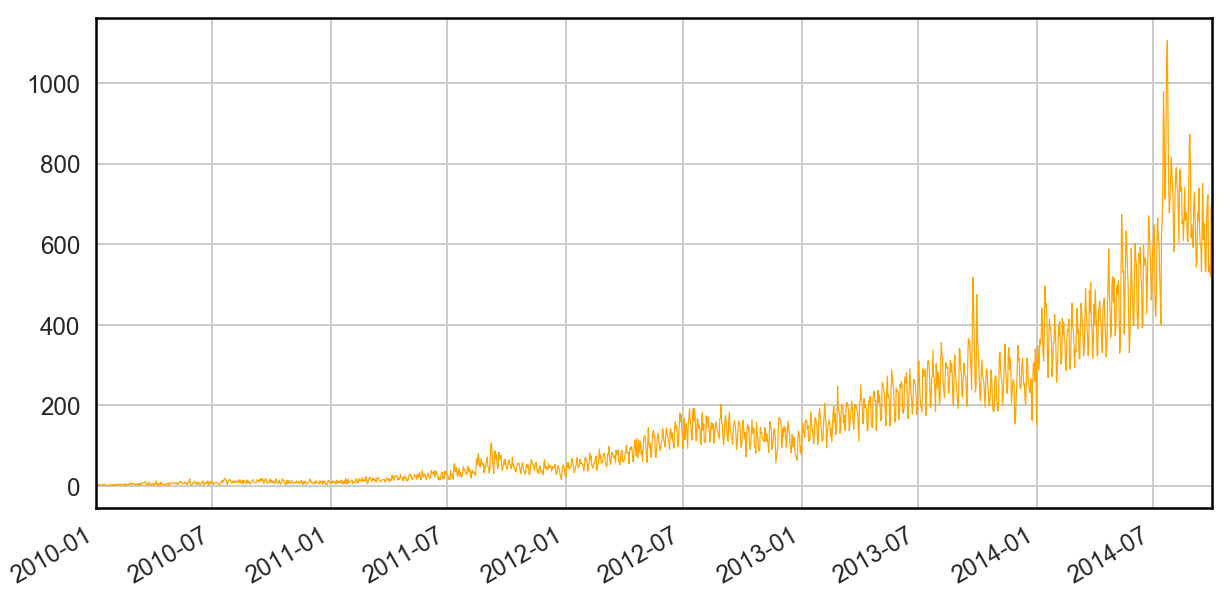

In [24]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='orange', figsize=(20, 10))

We can visuvalize based on the graph how fast Airbnb has grown from 2012. We next plot the first time active field to see if the feature correlates with the date of user creation . We can see from the below graph there is a very close correlation between the two date fields.

In [25]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'], errors='ignore')
users['date_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'], errors='ignore')

We see minor ups and down in the date plot to understand this variation better we plotted the count of number of users who signed up in Airbnb for each month. We can see that is a general upward trend in the number of users that are created however we can aslo see there is a pattern in the number of users that sign up for each month possibly a indication of an underlying trend. This is something this we would anticipate for Airbnb as people would tend to travel more during summer and holidays and travel less in other months.

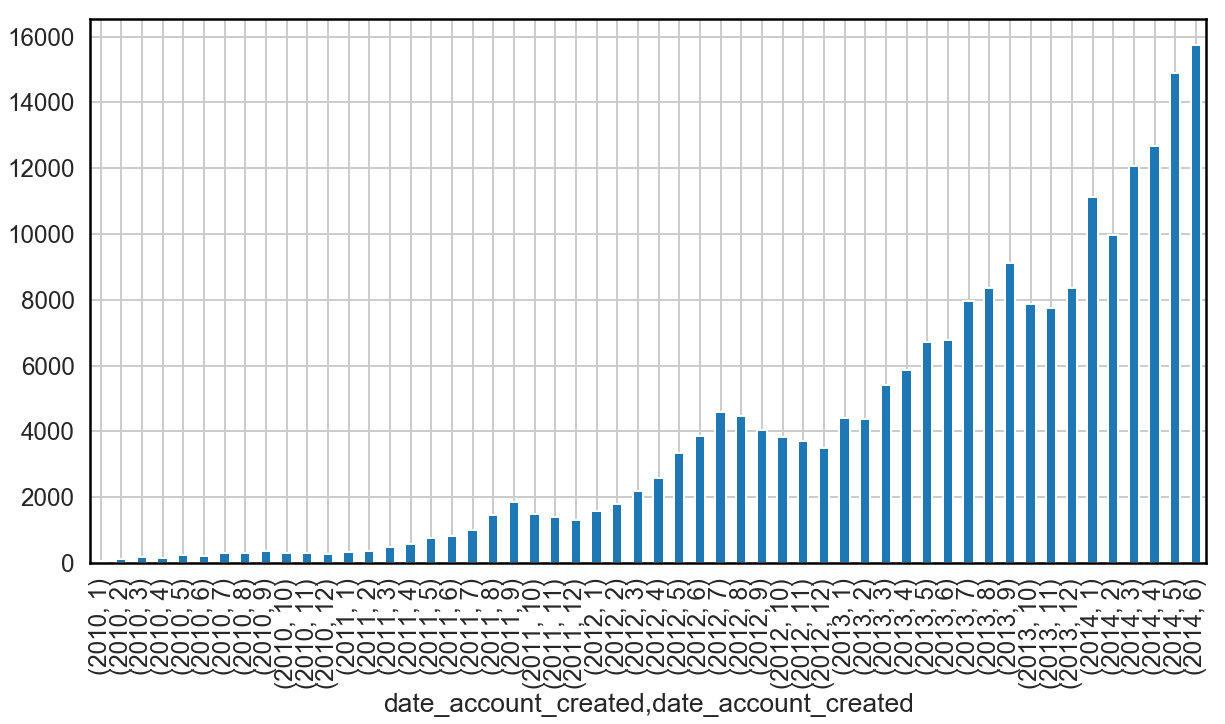

In [26]:

df = users[~users['country_destination'].isnull()]
df.groupby([df["date_account_created"].dt.year, df["date_account_created"].dt.month])['country_destination'].count().plot(kind="bar",figsize=(20,10))

We further explore the month dependency by plotting the month of booking vs country destinations. We can see from the plot below that inaddition to the variations in the total number of bookings by month we also see a variations in the destination that was booked. For example from the plot below Australia has significantly higher bookings in months 11 and 12 (November and December) compared to other months.

Text(0, 0.5, 'Log(Count)')

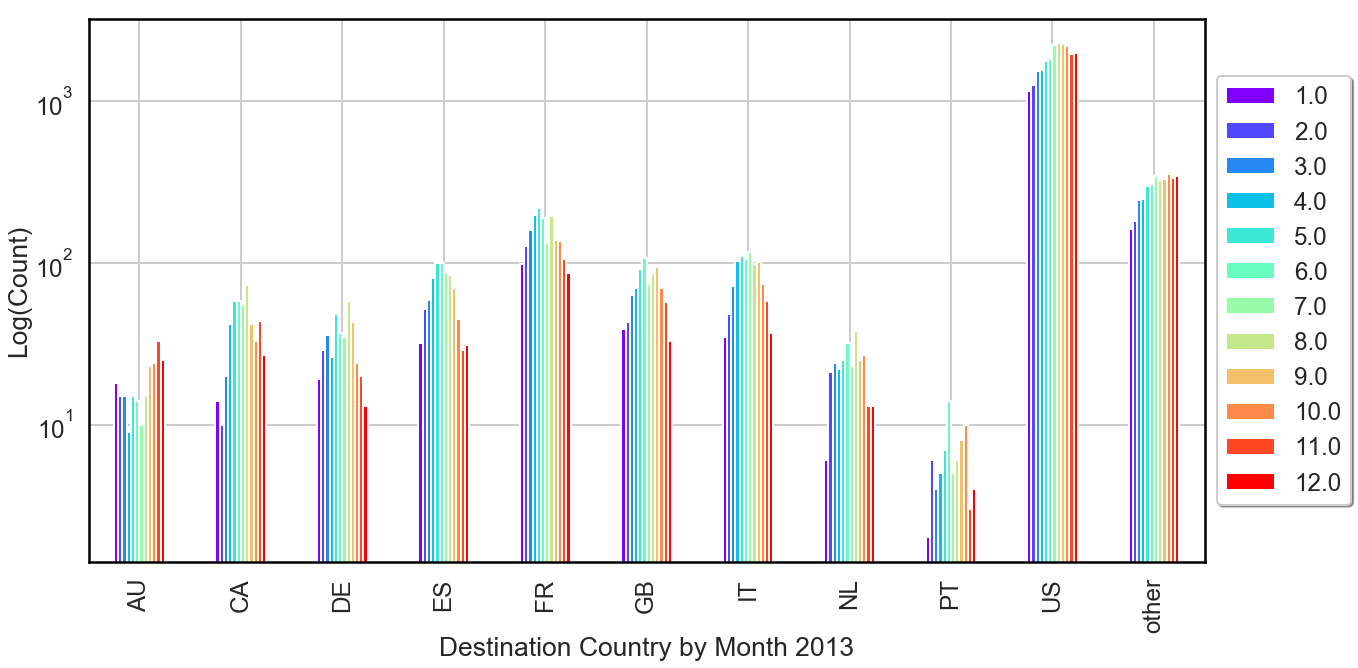

In [27]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0,1,12))
df[df["date_first_booking"].dt.year == 2013].groupby(['country_destination' , df["date_first_booking"].dt.month]).size().unstack().plot(kind='bar', stacked=False,color=colors, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Destination Country by Month 2013')
plt.ylabel('Log(Count)')

## Affiliate Information

Below is a plot of the number of bookings per destination by affiliate channel/affiliate provider/first affiliate tracked. We can see a disernable pattern . So all these three features are good predictors of the destination country.

Text(0, 0.5, 'Log(Count)')

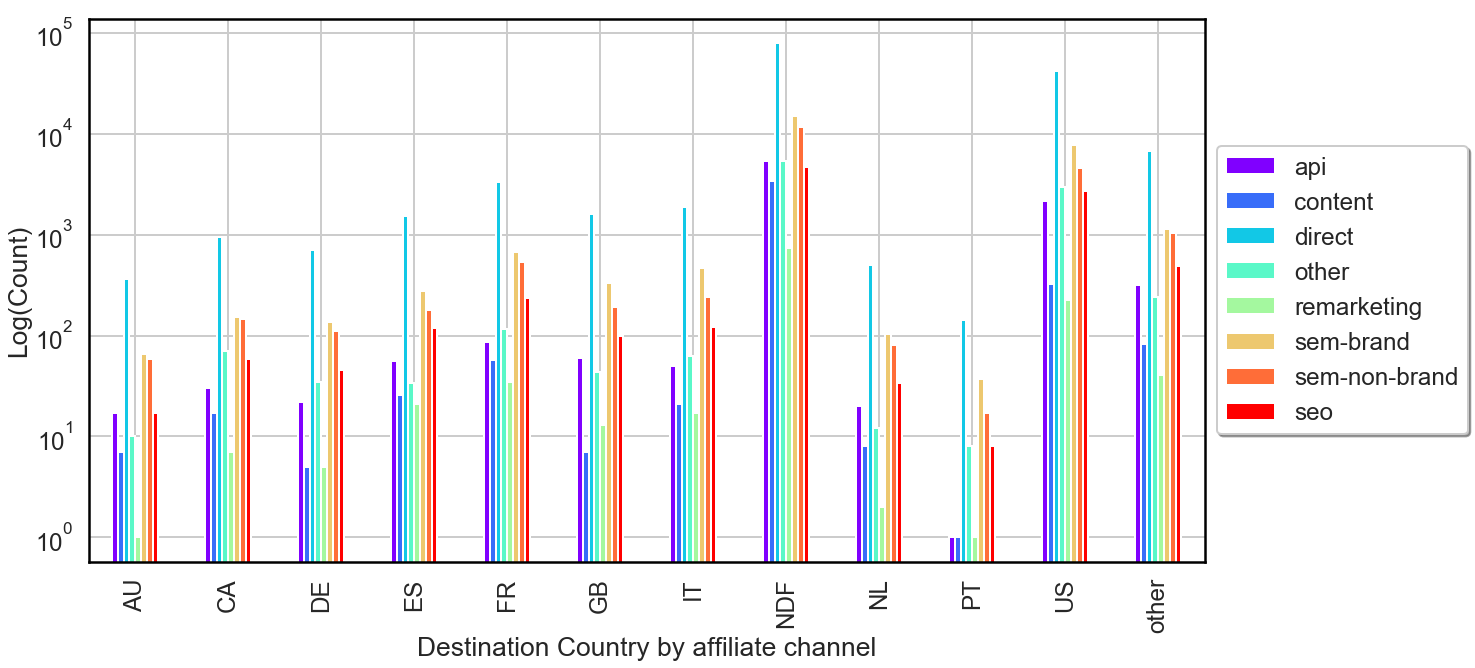

In [28]:
colors = cm.rainbow(np.linspace(0,1,users['affiliate_channel'].nunique()))
users.groupby(['country_destination','affiliate_channel']).size().unstack().plot(kind='bar', stacked=False,color=colors, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Destination Country by affiliate channel')
plt.ylabel('Log(Count)')

Text(0, 0.5, 'Log(Count)')

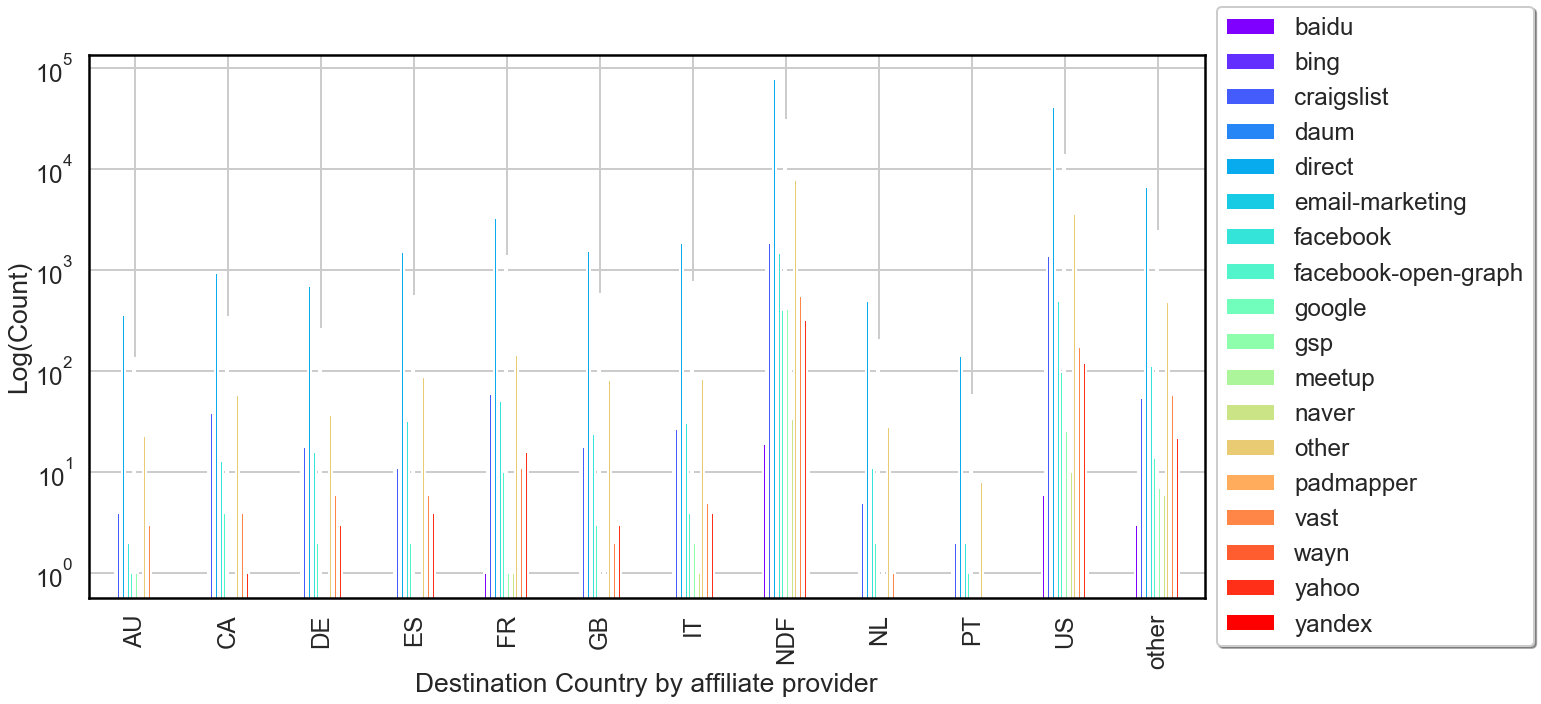

In [29]:
colors = cm.rainbow(np.linspace(0,1,users['affiliate_provider'].nunique()))
users.groupby(['country_destination','affiliate_provider']).size().unstack().plot(kind='bar', stacked=False,color=colors, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Destination Country by affiliate provider')
plt.ylabel('Log(Count)')

Text(0, 0.5, 'Log(Count)')

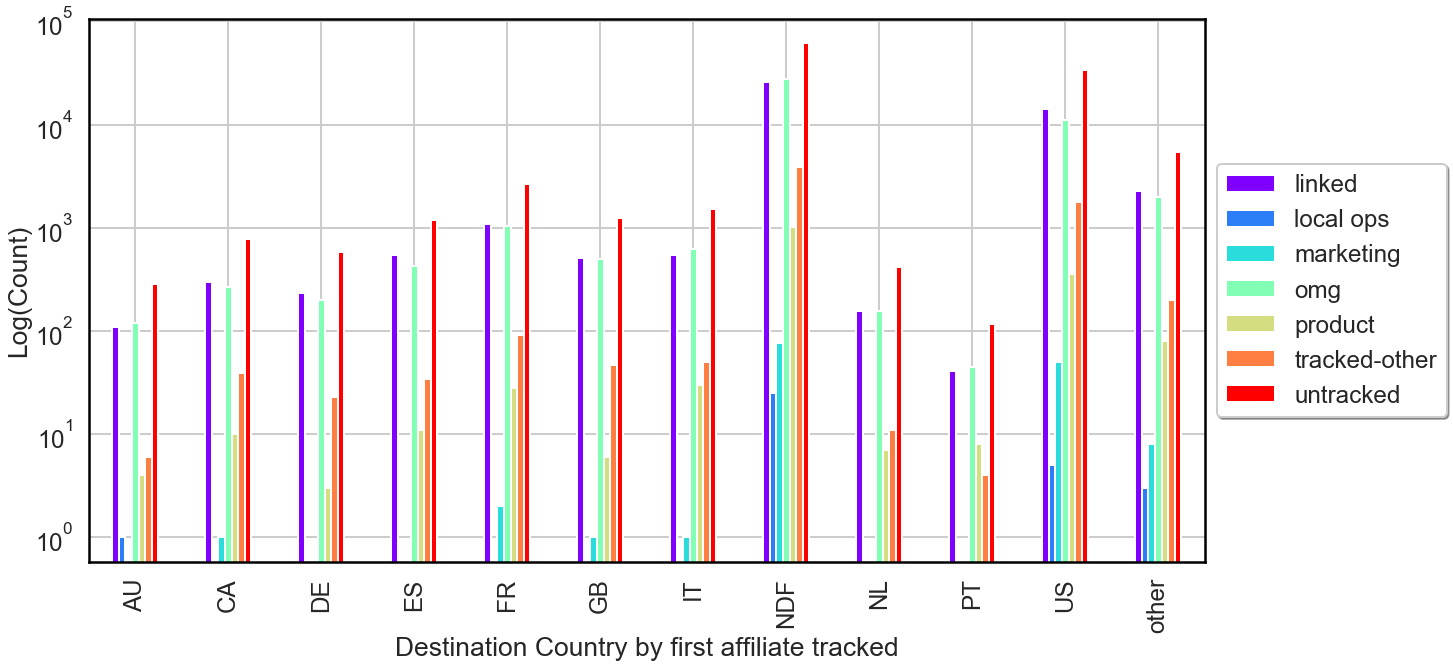

In [30]:
colors = cm.rainbow(np.linspace(0,1,users['first_affiliate_tracked'].nunique()))
users.groupby(['country_destination','first_affiliate_tracked']).size().unstack().plot(kind='bar', stacked=False,color=colors, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Destination Country by first affiliate tracked')
plt.ylabel('Log(Count)')

# <u> Data Preprocessing</u>


## Age

In the data exploration we already noted that the Age was key feature for predicting destinations. We are also aware of the outiers ie values greater than 85 and less than 18 . In this step we clean the outliers so that they dont adversely affect our model.

Also , Age is really fine grained. We are going to make bins and fit each user in the proper age group so that we can predict it in categories. Below is a plot of the numbers of users in each Age group . Group 0 is largest which represents the users with no age data. 

In [31]:
import numpy as np
import pandas as pd
users.loc[users.age > 85, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan
users['age'].fillna(-1,inplace=True)
bins = [-1, 0, 4, 9, 14, 19, 24, 29, 34,39,44,49,54,59,64,69,74,79,84,89]
users['age_group'] = np.digitize(users['age'], bins, right=True)

Text(0, 0.5, 'Log(Count)')

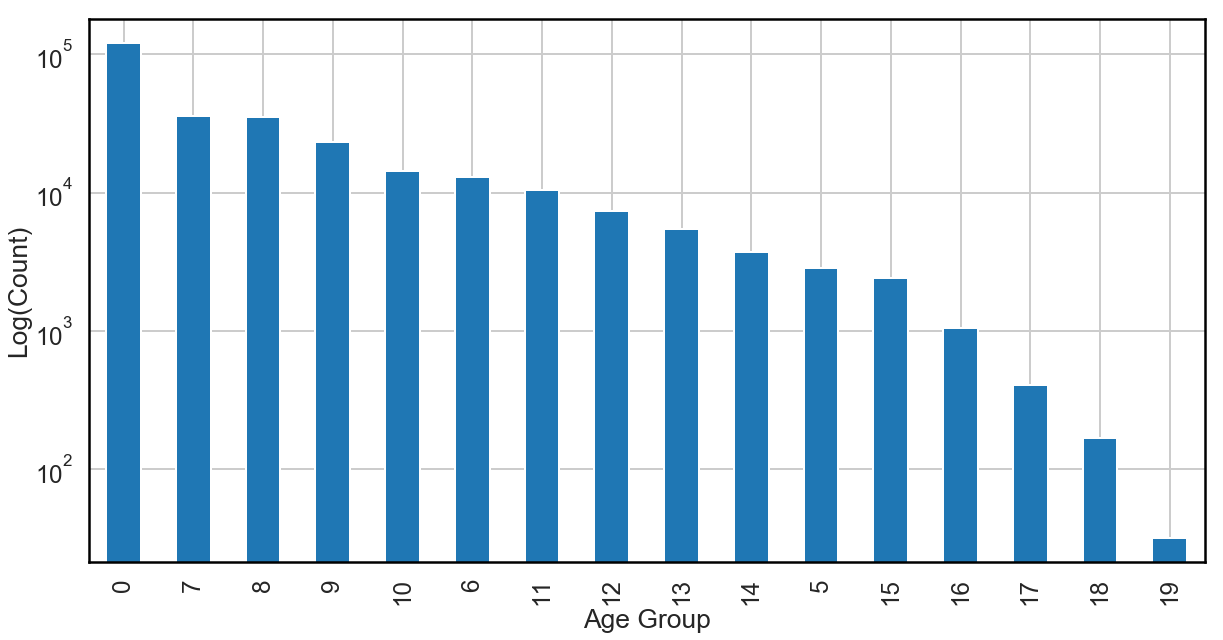

In [32]:
%matplotlib inline
users.age_group.value_counts().plot(kind='bar', figsize=(20,10))
plt.yscale('log')
plt.xlabel('Age Group')
plt.ylabel('Log(Count)')

## Date

We first cast the date records to proper date format. We had noted in the exploration that the month in which either the user signed up in Airbnb or booked in Airbnb is good predictor for the destination the user will book . So from the create date we parse out the month , week day as seperate features. We also create new features based on the date first active field which includes a time stamp. We create month first active , week day first active variable. In addition to this we also create a hour first active as we hypotesize that someone creating a account for the first time at odd hours are more likely to make a booking .

In [33]:
df = users[users['country_destination'].isnull()]

In [34]:
date_account_created = pd.DatetimeIndex(users['date_account_created'])
date_first_active = pd.DatetimeIndex(users['date_first_active'])
date_first_booking = pd.DatetimeIndex(users['date_first_booking'])

In [35]:
#users['day_account_created'] = date_account_created.day
users['weekday_account_created'] = date_account_created.weekday
#users['week_account_created'] = date_account_created.week
users['month_account_created'] = date_account_created.month
#users['year_account_created'] = date_account_created.year
#users['day_first_active'] = date_first_active.day
users['weekday_first_active'] = date_first_active.weekday
#users['week_first_active'] = date_first_active.week
users['month_first_active'] = date_first_active.month
users['month_first_book'] = date_first_booking.month
users['hour_first_active'] = date_first_active.hour
#users['year_first_active'] = date_first_active.year

In [36]:
users['time_lag_create'] = (date_first_booking - date_account_created).days
users['time_lag_active'] = (date_first_booking - date_first_active).days
users['time_lag_create'].fillna(365,inplace=True)
users['time_lag_active'].fillna(365,inplace=True)

Next we create two new features from the dates one is the time lag create which is the time in days between the date of creation and date the customer made the first booking in Airbnb and the second one is time lag active which is the time in days between the date the customer was first active to the date the customer made the first booking . The below plot's show that the time lag features will be able to effectively predict both whether a customer will make a booking or not and also the ultimate destination the customer will make the booking.

C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
C:\Users\shrey\Anaconda3\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relativ

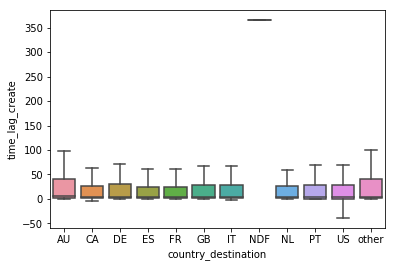

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)
ax = sns.boxplot(x="country_destination", y="time_lag_create", showfliers=False,data=users[~(users['country_destination'].isnull())])
#users[~(users['country_destination'].isnull())][['time_lag_create','country_destination']].boxplot(by='country_destination')

C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
C:\Users\shrey\Anaconda3\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


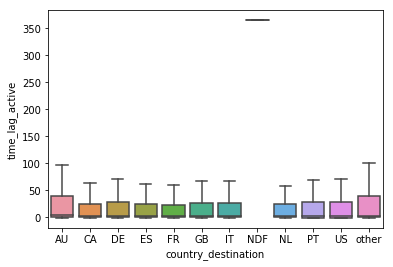

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)
ax = sns.boxplot(x="country_destination", y="time_lag_active", showfliers=False,data=users[~(users['country_destination'].isnull())])
#users[~(users['country_destination'].isnull())][['time_lag_create','country_destination']].boxplot(by='country_destination')

In [39]:
users[['time_lag_create','time_lag_active']].describe()

,time_lag_create,time_lag_active
count,275547.000000,275547.000000
mean,261.543098,261.326812
std,157.921613,158.395423
min,-349.000000,-1.000000
25%,41.000000,41.000000
50%,365.000000,365.000000
75%,365.000000,365.000000
max,365.000000,1368.000000


In [40]:
users.loc[users.time_lag_create > 365, 'time_lag_create'] = 365
users.loc[users.time_lag_active > 365, 'time_lag_create'] = 365

In [41]:
drop_list = [
    'date_account_created',
    'date_first_active',
    'date_first_booking',
    'timestamp_first_active',
    'age'
]

users.drop(drop_list, axis=1, inplace=True)

## Session Information

There is a lot of information in the sessions.csv file. We extracted the below features from the sessions.csv file.

    Count of each action types
    Sum of time elapse for each action
    Pertange of the time elapsed for each action type aginst the total elapsed time for a user
    Count of unique number action detail
    Count of number uniqe devices the user used

We merged all this data back with the users data. We had to note that the sessions file included data only from 1/1/2014 however the training data included users from 2010 so there were a large number of user records who dont have any session data . However for all test users we have the session data so we would expect the model do probably less efectively on the training set based on how we choose data to train and test but the model will probably do better on the the testing data.

In [42]:
sessions.rename(columns = {'user_id': 'id'}, inplace=True)

In [43]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

action_count = sessions.groupby(['id'])['action'].nunique()

#action_count = pd.DataFrame(min_max_scaler.fit_transform(action_count.fillna(0)),columns=action_count.columns)
action_type_count = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_type_count.columns = action_type_count.columns.map(lambda x: str(x) + '_count')
#action_type_count = pd.DataFrame(min_max_scaler.fit_transform(action_type_count.fillna(0)),columns=action_type_count.columns)
action_type_sum = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(sum)

action_type_pcts = action_type_sum.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()
action_type_pcts.columns = action_type_pcts.columns.map(lambda x: str(x) + '_pct')
action_type_sum = action_type_sum.unstack()
action_type_sum.columns = action_type_sum.columns.map(lambda x: str(x) + '_sum')
action_detail_count = sessions.groupby(['id'])['action_detail'].nunique()

#action_detail_count = pd.DataFrame(min_max_scaler.fit_transform(action_detail_count.fillna(0)),columns=action_detail_count.columns)

device_type_sum = sessions.groupby(['id'])['device_type'].nunique()

#device_type_sum = pd.DataFrame(min_max_scaler.fit_transform(device_type_sum.fillna(0)),columns=device_type_sum.columns)

sessions_data = pd.concat([action_count, action_type_count, action_type_sum,action_type_pcts,action_detail_count, device_type_sum],axis=1)
action_count = None
action_type_count = None
action_detail_count = None
device_type_sum = None


#users = users.join(sessions_data, on='id')

In [44]:
users= users.reset_index().join(sessions_data, on='id')

## Encode categorical features

The next step is to encode categorical features. The categorical variables in the data cannot be used as is in the machine learning models. We need to encode them into numeric values. We encoded the categorical variables using the one hot encoding method.

In [45]:
from sklearn.preprocessing import LabelEncoder
categorical_features = [
    'gender', 'signup_method', 'signup_flow', 'language',
    'affiliate_channel', 'age_group','weekday_account_created','month_account_created','weekday_first_active','month_first_active','hour_first_active',
    'signup_app','affiliate_provider', 'first_affiliate_tracked','first_device_type', 'first_browser'
]
users_sc = users.copy(deep=True)
encode = LabelEncoder()
for j in categorical_features:
    users_sc[j] = encode.fit_transform(users[j].astype('str'))

# Feature Selection

At the end of all preprocessing steps we had a total of 54 features that we have extracted from the users and sessions data set. Using all these features may lead to overfitting and could also be time consuming processing on many Machine learning algorithms. So in the next step we performed feature selection were we reduced the number of features using a standard sklearn feature extraction library VarianceThreshold.

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples.

These features which are common for more than 80 % of the data dont necessarily capture all the avriations in the data and will not be good predictors . So we eliminate the variables with low threshold and arrived at a final list of features which are listed below.

Below is the final list of 40 features which we used to build our models.

In [46]:
colx = users_sc.columns.tolist()
rm_list = ['id','country_destination']
for x in rm_list:
    colx.remove(x)
X = users_sc[~(users_sc['country_destination'].isnull())][colx]
X.fillna(0,inplace=True)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.8))
sel.fit_transform(X)
idxs = sel.get_support(indices=True)
colo = [X.columns.tolist()[i] for i in idxs]
print ('\n'.join(colo))
for y in rm_list:
    colo.append(y)

affiliate_channel
affiliate_provider
first_affiliate_tracked
first_browser
first_device_type
gender
language
signup_flow
age_group
weekday_account_created
month_account_created
weekday_first_active
month_first_active
month_first_book
hour_first_active
time_lag_create
time_lag_active
action
-unknown-_count
click_count
data_count
submit_count
view_count
-unknown-_sum
booking_request_sum
booking_response_sum
click_sum
data_sum
message_post_sum
partner_callback_sum
submit_sum
view_sum
-unknown-_pct
booking_request_pct
click_pct
data_pct
message_post_pct
submit_pct
view_pct
action_detail


In [47]:
categorical_features_1 = [val for val in categorical_features if val in colo]
users_encode = pd.get_dummies(users[colo], columns=categorical_features_1)
users_encode.to_csv(f'{my_path}/users_data_feature.csv')

## Countries and Age Bkdts dataset

Though the countries and the age dataset provide some valuable information on the destination countries and the age group of the population in these countries we find no use for them on the task at hand. If we had further information on the users in our dataset such as exact location in the US and other demographic details of users such as marital status, household income etc we could have possible used the data from the data sets to build a more robust prediction model.

In [48]:
from time import time
from math import sqrt
import logging
import os
import sys
import csv
import datetime


total = {}
started = {}
model_perf={}

        
def start(key):
    started[key]=time()


def stop(key):
    stop=time()
    start=started.pop(key,None)
    if start:
        if key in total:
            total[key].append(stop-float(start))
        else:
            total[key]=[stop-float(start)]
    else:
        logging.error("stopping non started timer: %s"%key)

# <u> Building Model(s) using train_test_split</u>



We now proceed to model building stage . But before we start training the models we perform one last data preparation step.

We split the training data in a 80:20 ratio and use the 80 percent of the data to build the model and 20 percent of the data to validate it. While splitting we used the stratify option in the sklearn library to ensure that the data that is selected includes a representative set of the user data with the country destinations in the same proportion as the full dataset. This is very essential since the distribution of the country destination is highly unbalanced .
Time lag variables

The time lage variables both time_lag_create and time_lag_active were identified as key features both by the variance threshold method and the Decision Tree and Random forest models we built. The models built with these features included had a accuracy value of 0.88 and nDCG score of 0.92 . However we were not able to use these models on the test dataset since the test data set doesnt have the date of booking for the users. We do believe that these values can be used very usefully in future where we have more data points and time related informtion on the session and user data sets. For current report we excluded these two variables from models.

In [49]:
from sklearn.model_selection import train_test_split
users = users_encode
users.set_index('id',inplace=True)
users.drop([col for col in users.columns if 'pct_booking_request' in col],axis=1,inplace=True)
users.drop([col for col in users.columns if 'booking_request_count' in col],axis=1,inplace=True)
colx = users.columns.tolist()
#colx_1 = users_data_1.columns.tolist()
rm_list = ['country_destination','month_first_book', 'time_lag_create','time_lag_active']
for x in rm_list:
    colx.remove(x)
X_1 = users[(users['country_destination'].isnull())][colx]
X_1.fillna(0,inplace=True)
X = users[~(users['country_destination'].isnull())][colx]
#X_1 = users_data_1[~(users_data_1['country_destination'].isnull())][colx_1]
Y = users[~(users['country_destination'].isnull())]['country_destination']
#Y_1 = users_data_1[~(users_data_1['country_destination'].isnull())]['country_destination']
X.fillna(0,inplace=True)
#X_1.fillna(0,inplace=True)
#X_res,Y_res = ada.fit_sample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

#X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42,stratify=Y)

In [50]:
X_train.shape

(170760, 244)

### Splitting Train set into Train and Valid

In [51]:
X_train_new, X_valid, Y_train_new, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [52]:
X_train_new.shape

(136608, 244)

# <u>Training model with train set and checking performance on Valid set</u>

# Logistic Regression - OVR (One Vs Rest)

We first built a Logistic regression model optimised for OVR (One Vs Rest). Since more than 3/4 of the country destination is accounted for by 'NDF' and 'US' we evaluated the performance of the Logistic Regression model optimised to minimize the loss for OVR.

In [53]:
from sklearn.linear_model import LogisticRegression
start('logr')
logr = LogisticRegression()
logr.fit(X_train_new, Y_train_new)
stop('logr')

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Support Vector Machine- Linear classifier

Next we built built a SVM-Linear Classifier model. SVM - Linear classification is not well suited to the problem at hand since they cannot predict probabilities for the target classes. However we wanted to evaluate how well the model does for a single value prediction .

In [54]:
from sklearn.svm import LinearSVC
start('svc')
svc = LinearSVC(random_state=42)
svc.fit(X_train_new, Y_train_new)
stop('svc')

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision Tree and Hyperparameter Tuning

Next we built a decision tree classifier. Since this was a multiclass classification problem decision tree is well suited for the problem at hand . The key features in the model and their weights are detailed below.

In [55]:
from sklearn.tree import DecisionTreeClassifier
start('dt')
for n in range(1,10):
    for m in range (1, 30):
        dt = DecisionTreeClassifier(criterion = "gini", random_state = n,
                               max_depth=m, min_samples_leaf=5)
dt.fit(X_train_new, Y_train_new)
stop('dt')

### Feature Importance

In [56]:
feature_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), X.columns.tolist()), 
             reverse=True))
feature_imp.columns = ['value','feature']
feature_imp.set_index('feature',inplace=True)
feature_imp.head(10)

,value
feature,
age_group_0,0.2659
gender_MALE,0.0319
signup_flow_3,0.0261
first_affiliate_tracked_untracked,0.0182
affiliate_channel_content,0.0174
booking_request_pct,0.0162
signup_flow_0,0.0158
gender_FEMALE,0.0158
first_device_type_Other/Unknown,0.0157


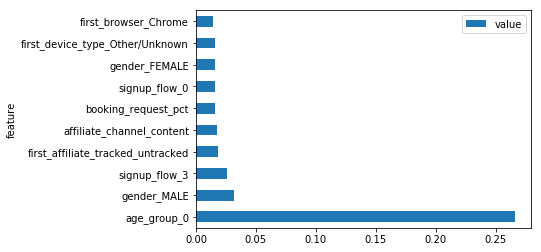

In [57]:
%matplotlib inline
feature_imp.nlargest(10,'value').plot(kind='barh')

# Random Forest and Hyperparameter Tuning

Next we built a Random forest classifier. Random forest or random decision forest is an ensemble learning method for classification, regression and other tasks, that operate's by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forest correct for decision trees' habit of overfitting to their training set. 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
start('rf')
for x in range(1,64):
    clf = RandomForestClassifier(n_estimators=x,n_jobs=-1)
clf.fit(X_train_new, Y_train_new)
stop('rf')

### Feature Importance

In [59]:
feature_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns.tolist()), 
             reverse=True))
feature_imp.columns = ['value','feature']
feature_imp.set_index('feature',inplace=True)
feature_imp.nlargest(10,'value')

,value
feature,
age_group_0,0.0428
gender_FEMALE,0.0183
hour_first_active_21,0.0163
hour_first_active_19,0.0162
hour_first_active_20,0.0160
hour_first_active_18,0.0159
hour_first_active_23,0.0158
hour_first_active_22,0.0158
first_browser_Chrome,0.0158


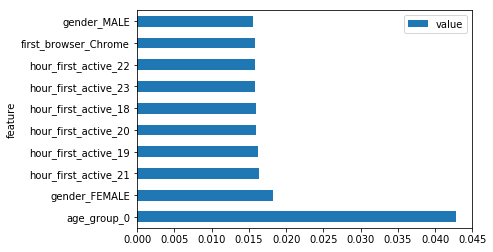

In [60]:
%matplotlib inline
feature_imp.nlargest(10,'value').plot(kind='barh')

# <u> Metrics to compute the model performance </u>
# Normalized Discounted cumulative gain (DCG) at rank K.

Normalized Discounted Cumulative Gain (NDCG) measures the performance of a recommendation system based on the graded relevance of the recommended entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal ranking of the entities.

In [61]:


import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer


def dcg_score(y_true, y_score, k=5):
    """Discounted cumulative gain (DCG) at rank K.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.

    Returns
    -------
    score : float
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    """Normalized discounted cumulative gain (NDCG) at rank K.

    
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1]+ 1))
    T = lb.transform(ground_truth)


    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# <u> Results on Valid set</u>


### Logistic Regression - OVR

The confusion matrix for the Logistic Regression - OVR method is as below. As we can see in the table the model does a pretty could job of predicting NDF however prediction accruacy is very low for all the other destinations. The accuracy for VALID SET in this model is 0.48802412743031154.


We also calculated the nDCG score by predicting the probability for each for destinations for each of the users. The Logistic Regression - OVR method got a nDCG score of 0.4656877058854589

In [62]:
start('logr')
y_pred_logr=logr.predict(X_valid)
stop('logr')
pd.crosstab(Y_valid, y_pred_logr, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,IT,NDF,PT,US,other
Actual Destination,,,,,
AU,29,57,0,2,0
CA,83,126,0,4,0
DE,54,122,0,2,0
ES,141,234,0,8,0
FR,288,508,0,12,0
GB,138,242,0,6,0
IT,148,268,0,7,0
NDF,3560,16302,1,91,0
NL,44,81,0,1,0


### Normalized Discounted Cumulative Gain (NDCG) for Logistic Regression OVR

In [63]:


y_conv = [clf.classes_.tolist().index(k) for k in Y_test.tolist()] 
start('logr')
y_pred_prob_logr=logr.predict_proba(X_valid)
stop('logr')
print('nDCG:' + str(ndcg_score(y_conv,y_pred_prob_logr)))
model_perf['logr','nDCG'] = ndcg_score(y_conv,y_pred_prob_logr)
#pd.DataFrame(y_pred_prob,columns=clf.classes_)

nDCG:0.4656877058854589


### Accuracy for Logistic Regression OVR

In [64]:

from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_valid, y_pred_logr)))
model_perf['logr','Accuracy'] = accuracy_score(Y_valid, y_pred_logr)

Accuracy:0.48802412743031154


# Performance Metrics- CONFUSION MATRIX

### Confusion Matrix between predicted and true destination (TP, TN , FP, FN is shown for all the desinations)

The Confusion matrix is one of the most intuitive and easiest (unless of course, you are not confused)metrics used for finding the correctness and accuracy of the model. It is used for Classification problem where the output can be of two or more types of classes.



Text(0.5, 69.0, 'Predicted Destination')

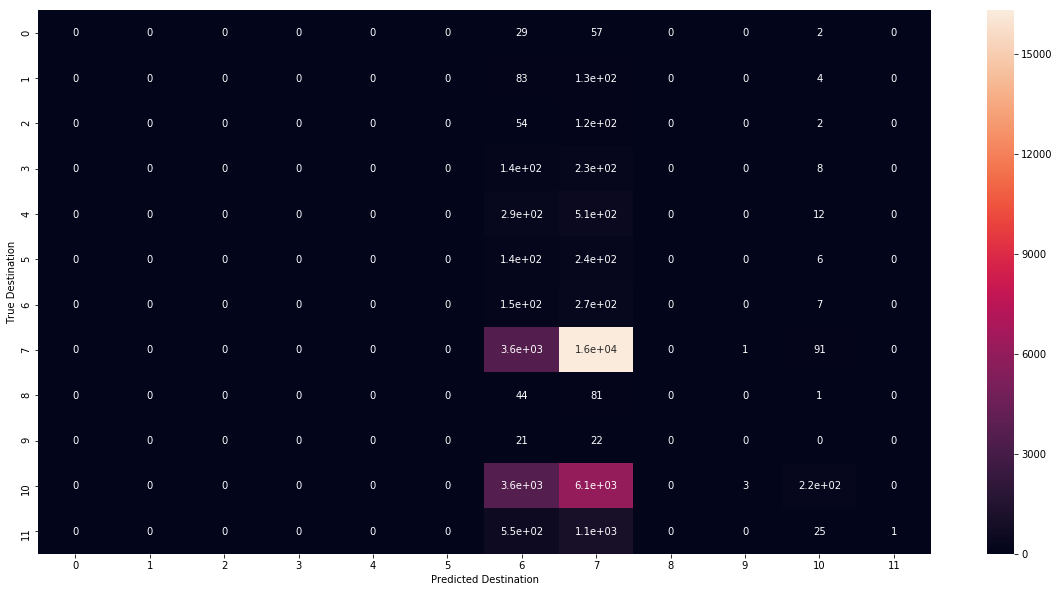

In [65]:


labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_valid, y_pred_logr, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True Destination')
plt.xlabel('Predicted Destination')

## Support Vector Machine- Linear classifier 

The confusion matrix for the SVM Linear Classifier method is as below. As we can see in the table the model fares very badly in predicting almost all destinations. The accuracy for this model on VALID set is 0.5830405247130476 . This indicates the decision bouandries are not linear and we should explore non linear SVM model. 

We were unable to compute the nDCG score for this model as the SVM Linear method cannot predict probabilities for all the classes.



In [66]:
start('svc')
y_pred_svc=svc.predict(X_valid)
stop('svc')
pd.crosstab(Y_valid, y_pred_svc, rownames=['Actual Destination'], colnames=['Predicted Destination']) 

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,,
AU,1,0,0,1,0,0,0,58,0,0,26,2
CA,1,0,0,2,0,0,0,143,1,0,63,3
DE,0,0,0,1,0,0,0,125,0,0,51,1
ES,0,0,0,0,2,0,0,257,0,1,119,4
FR,2,1,1,7,1,0,0,570,0,0,221,5
GB,0,0,0,3,1,0,0,263,0,0,116,3
IT,0,0,0,3,2,0,0,300,0,0,112,6
NDF,27,12,11,203,111,7,1,16748,4,39,2671,120
NL,0,0,0,1,0,0,0,90,0,0,33,2


### Accuracy for SVM

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_valid, y_pred_svc)))
model_perf['svc','Accuracy'] = accuracy_score(Y_valid, y_pred_svc)

Accuracy:0.5830405247130476


### Confusion Matrix between predicted and true destination for SVM

Text(0.5, 69.0, 'Predicted Destination')

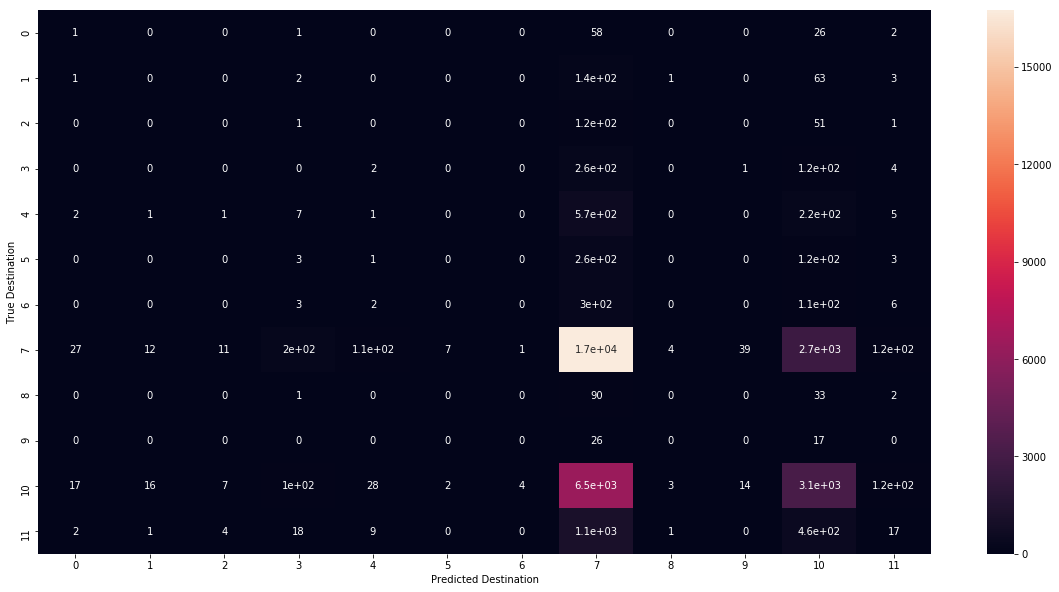

In [68]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_valid, y_pred_svc, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True Destination')
plt.xlabel('Predicted Destination')

# Decision Tree

The confusion matrix for the Decision tree classifier is as below. As we can see in the table the model does a pretty could job of predicting NDF however predictiong is very low for all the other destinations. The accuracy for VALID SET in this model is 0.5872569688451628.

We also calculated the nDCG score by predicting the probability for each for destinations for each of the users. The Decision tree model got a nDCG score of 0.7511348284039163

In [69]:
start('dt')
y_pred_dt=dt.predict(X_valid)
stop('dt')
pd.crosstab(Y_valid, y_pred_dt, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,US,other
Actual Destination,,,,,,,,,,
AU,0,0,0,0,0,0,0,57,31,0
CA,0,0,1,1,0,0,0,129,80,2
DE,0,0,0,1,2,0,0,110,65,0
ES,0,0,1,1,1,0,1,239,138,2
FR,0,1,0,2,10,3,0,503,283,6
GB,0,0,0,1,5,0,4,248,126,2
IT,0,0,0,1,5,1,1,276,134,5
NDF,2,4,1,10,55,12,17,16429,3355,69
NL,0,0,0,0,3,1,0,80,41,1


### Normalized Discounted Cumulative Gain (NDCG) for Decision Tree

In [70]:
start('dt')
y_pred_prob_dt=dt.predict_proba(X_valid)
stop('dt')
print('nDCG:' + str(ndcg_score(y_conv,y_pred_prob_dt)))
ndcg_score(y_conv,y_pred_prob_dt)
model_perf['dt','nDCG'] = ndcg_score(y_conv,y_pred_prob_dt)

nDCG:0.7511348284039163


### Accuracy for  Decision Tree

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_valid, y_pred_dt)))
model_perf['dt','Accuracy'] = accuracy_score(Y_valid, y_pred_dt)

Accuracy:0.5872569688451628


### Confustion Matrix between true and predicted Destinations for  Decision Tree

Text(0.5, 69.0, 'Predicted label')

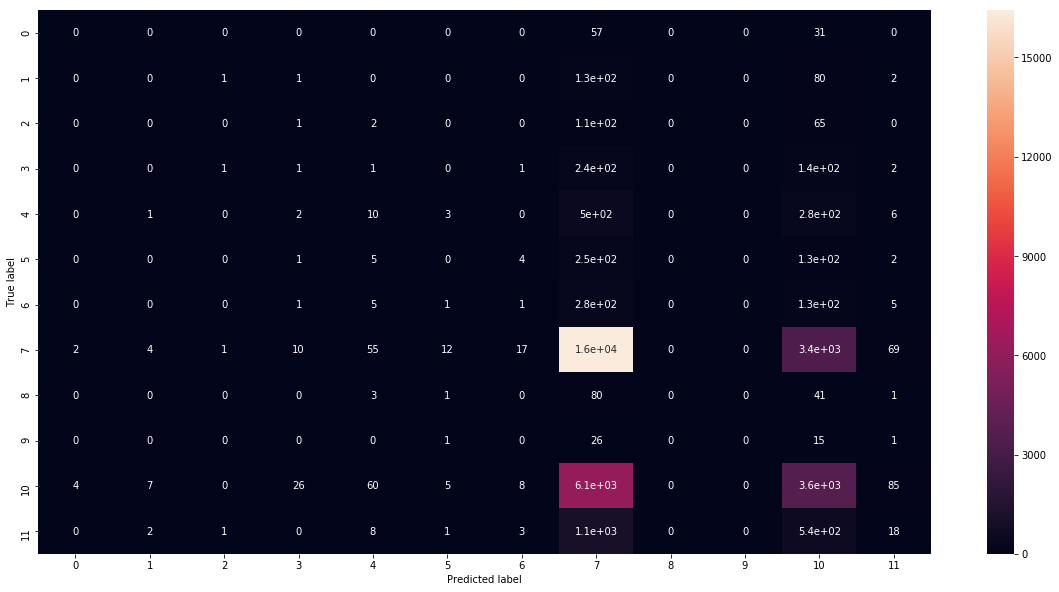

In [72]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_valid, y_pred_dt, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Random Forest

The confusion matrix for the Random tree classifier is as below. As we can see in the table the model does a pretty could job of predicting NDF as well US destinations however accuracy is very low for all the other destinations. The accuracy for this model is 0.581693605059733.


We also calculated the nDCG score by predicting the probability for each for destinations for each of the users. The Logistic Regression - OVR method got a nDCG score of 0.7610935417824917

In [73]:
start('rf')
y_pred=clf.predict(X_valid)
stop('rf')
pd.crosstab(Y_valid, y_pred, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,,
AU,1,0,0,0,0,0,0,53,0,0,34,0
CA,0,0,1,0,0,2,0,133,0,0,76,1
DE,0,0,0,1,0,1,0,118,0,0,56,2
ES,0,0,1,2,0,1,1,250,1,0,125,2
FR,0,0,0,0,0,2,1,523,0,0,276,6
GB,0,0,0,0,1,2,0,242,0,0,138,3
IT,1,1,0,0,2,1,2,285,0,0,127,4
NDF,5,17,12,23,65,28,30,16120,11,5,3510,128
NL,0,0,0,0,1,0,0,76,1,0,47,1


### Normalized Discounted Cumulative Gain (NDCG) for Random forest

In [74]:
start('rf')
y_pred_prob=clf.predict_proba(X_valid)
stop('rf')
print('nDCG:' + str(ndcg_score(y_conv,y_pred_prob)))
model_perf['rf','nDCG'] = ndcg_score(y_conv,y_pred_prob)

nDCG:0.7610935417824917


### Accuracy for Random forest

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_valid, y_pred)))
model_perf['rf','Accuracy'] = accuracy_score(Y_valid, y_pred)

Accuracy:0.581693605059733


### Confusion Matrix between true and predicted Destinations for Random forest

Text(0.5, 69.0, 'Predicted Destination')

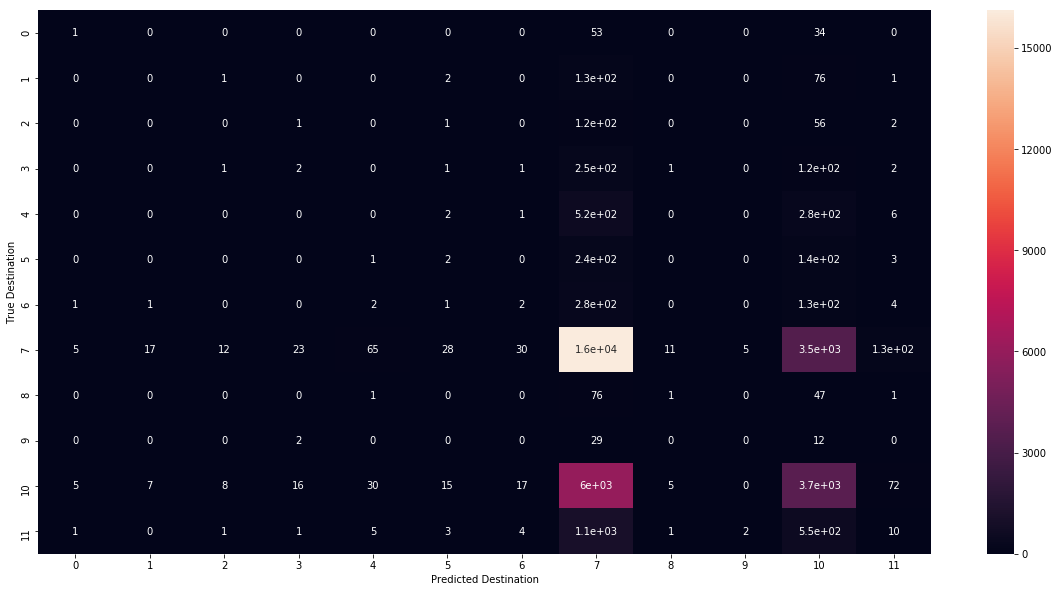

In [76]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_valid, y_pred, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True Destination')
plt.xlabel('Predicted Destination')

# <u>Comparing Performance of Different Machine Learning models on Valid set</u>

In [77]:
model1 = {}
value = {}
kag= {'dt':0.75291,'logr':0.84852,'rf':0.86449}
desc = {'dt':'Decision Tree','logr':'Logistic Regression OVR','rf':'Random Forest','svc':'Support Vector Classifier'}
for j in model_perf.keys():
    if desc[j[0]] not in model1.keys():
        value = {}
        value['Time(s)'] = total[j[0]][0]
        if j[0] in kag.keys():
            value['nDCG'] = kag[j[0]] 
    value[j[1]] = model_perf[j]
    model1[desc[j[0]]] = value
        
pd.DataFrame(model1).T

,Accuracy,Time(s),nDCG
Logistic Regression OVR,0.488024,173.720523,0.465688
Support Vector Classifier,0.583041,367.301897,NaN
Decision Tree,0.587257,5.215704,0.751135
Random Forest,0.581694,11.002515,0.761094


# <u> Results on TEST SET</u> 

## Logistic Regression - OVR

The confusion matrix for the Logistic Regression - OVR method is as below. As we can see in the table the model does a pretty could job of predicting NDF however prediction accruacy is very low for all the other destinations. The accuracy for this model on TEST SET is 0.48487971703637767.


We also calculated the nDCG score by predicting the probability for each for destinations for each of the users. The Logistic Regression - OVR method got a nDCG score of 0.5092473309286802

In [78]:
start('logr')
y_pred_logr_test=logr.predict(X_test)
stop('logr')
pd.crosstab(Y_test, y_pred_logr_test, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,IT,NDF,PT,US
Actual Destination,,,,,
AU,0,47,61,0,0
CA,0,106,176,0,4
DE,0,84,124,0,4
ES,0,159,287,0,4
FR,0,368,630,0,7
GB,0,164,293,0,8
IT,0,204,354,0,9
NDF,0,4531,20262,2,114
NL,0,58,94,0,0


### Normalized Discounted Cumulative Gain (NDCG) for Logistic Regression OVR- TEST SET

In [79]:
y_conv_test = [clf.classes_.tolist().index(k) for k in Y_test.tolist()] 
start('logr')
y_pred_prob_logr_test=logr.predict_proba(X_test)
stop('logr')
print('nDCG:' + str(ndcg_score(y_conv_test,y_pred_prob_logr_test)))
model_perf['logr','nDCG'] = ndcg_score(y_conv_test,y_pred_prob_logr_test)
#pd.DataFrame(y_pred_prob,columns=clf.classes_)

nDCG:0.5092473309286802


### Accuracy for Logistic Regression OVR- TEST SET

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_test, y_pred_logr_test)))
model_perf['logr','Accuracy'] = accuracy_score(Y_test, y_pred_logr_test)

Accuracy:0.48487971703637767


### Confusion Matrix between predicted and true destination - TEST SET

Text(0.5, 69.0, 'Predicted Destination')

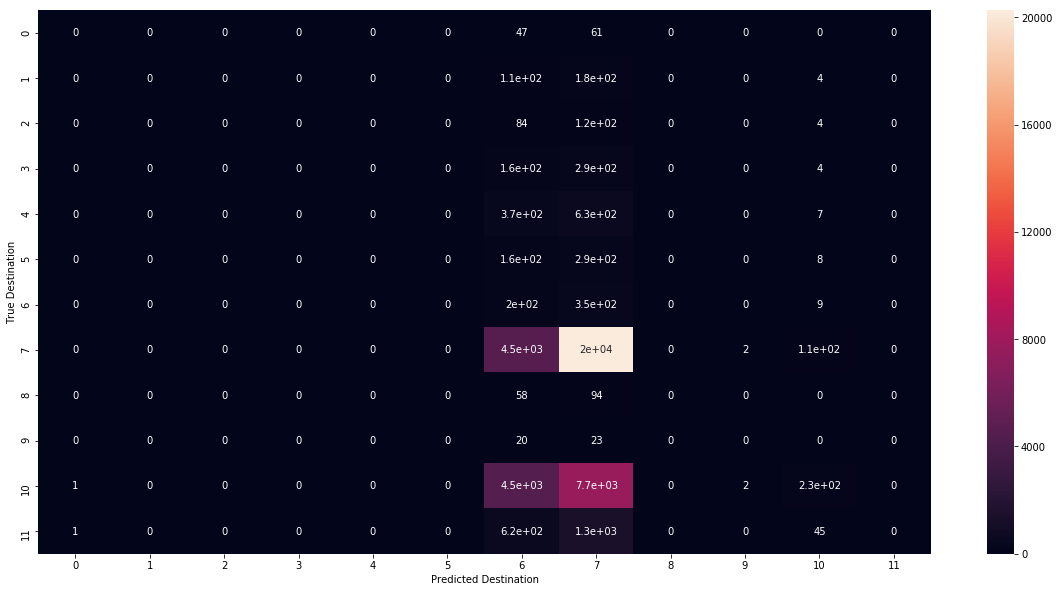

In [81]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_test, y_pred_logr_test, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True Destination')
plt.xlabel('Predicted Destination')

## Support Vector Machine- Linear classifier on Test Set

The confusion matrix for the SVM Linear Classifier method is as below. As we can see in the table the model fares very badly in predicting almost all destinations. The accuracy for this model is 0.5771942564006465 on TEST SET . This indicates the decision bouandries are not linear and we should explore non linear SVM model. 

We were unable to compute the nDCG score for this model as the SVM Linear method cannot predict probabilities for all the classes.



In [82]:
start('svc')
y_pred_svc_test=svc.predict(X_test)
stop('svc')
pd.crosstab(Y_test, y_pred_svc_test, rownames=['Actual Destination'], colnames=['Predicted Destination']) 

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,,
AU,0,0,0,1,0,0,0,72,0,0,35,0
CA,0,0,1,0,0,0,0,193,0,0,87,5
DE,0,0,0,0,0,0,0,154,0,0,56,2
ES,0,0,0,4,1,0,0,319,0,0,124,2
FR,0,0,0,7,1,0,0,687,0,0,304,6
GB,0,1,0,4,0,1,0,325,0,0,128,6
IT,0,0,0,2,2,0,0,397,0,1,161,4
NDF,38,20,16,280,126,4,3,20807,10,45,3428,132
NL,0,0,0,1,1,0,0,95,0,1,54,0


### Accuracy for SVM on Test set

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_test, y_pred_svc_test)))
model_perf['svc','Accuracy'] = accuracy_score(Y_test, y_pred_svc_test)

Accuracy:0.5771942564006465


### Confusion Matrix between predicted and true destination for SVM

Text(0.5, 69.0, 'Predicted Destination')

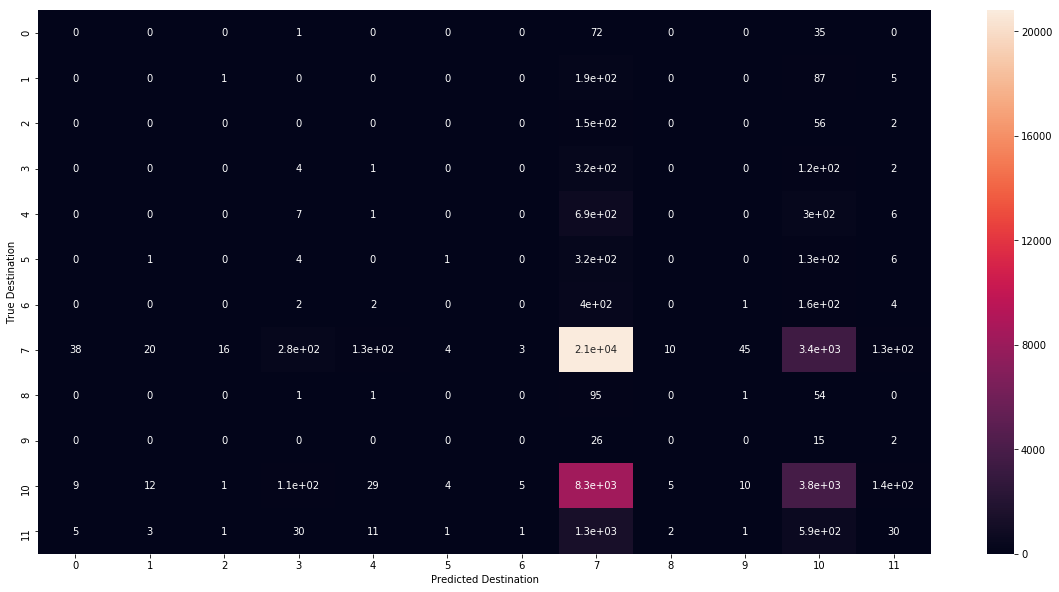

In [84]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_test, y_pred_svc_test, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True Destination')
plt.xlabel('Predicted Destination')

# Decision Tree

The confusion matrix for the Decision tree classifier is as below. As we can see in the table the model does a pretty could job of predicting NDF however predictiong is very low for all the other destinations. The accuracy for this model is 0.5845025883675716.

We also calculated the nDCG score by predicting the probability for each for destinations for each of the users. The Decision tree model got a nDCG score of 0.7872318550460398

In [85]:
start('dt')
y_pred_dt_test=dt.predict(X_test)
stop('dt')
pd.crosstab(Y_test, y_pred_dt_test, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,US,other
Actual Destination,,,,,,,,,,
AU,0,0,0,1,1,0,0,65,41,0
CA,0,0,0,0,1,0,0,187,98,0
DE,0,0,0,0,3,0,1,133,73,2
ES,0,1,0,0,1,0,1,301,144,2
FR,0,0,0,2,4,0,0,660,329,10
GB,0,1,1,1,4,1,0,300,151,6
IT,0,0,0,4,3,1,0,363,196,0
NDF,5,11,4,7,77,8,25,20456,4227,89
NL,0,0,1,0,0,0,0,96,54,1


### Normalized Discounted Cumulative Gain (NDCG) for Decision Tree on Test Set

In [86]:
start('dt')
y_pred_prob_dt_test=dt.predict_proba(X_test)
stop('dt')
print('nDCG:' + str(ndcg_score(y_conv,y_pred_prob_dt_test)))
ndcg_score(y_conv,y_pred_prob_dt)
model_perf['dt','nDCG'] = ndcg_score(y_conv,y_pred_prob_dt_test)

nDCG:0.7872318550460398


### Acurracy for Decision Tree on Test Set

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_test, y_pred_dt_test)))
model_perf['dt','Accuracy'] = accuracy_score(Y_test, y_pred_dt_test)

Accuracy:0.5845025883675716


### Confusion Matrix for Decision between true and predicted destinations 

Text(0.5, 69.0, 'Predicted label')

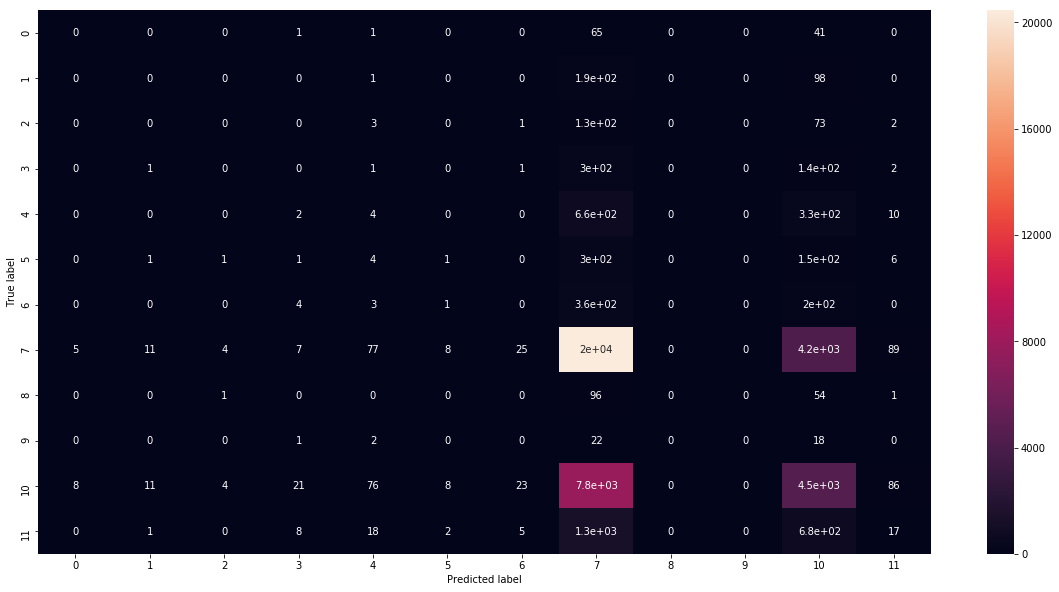

In [88]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_test, y_pred_dt_test, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')



## Random Forest

The confusion matrix for the Random tree classifier is as below. As we can see in the table the model does a pretty could job of predicting NDF as well US destinations however accuracy on TEST SET is 0.5792555808015741 with nDCG as 0.7938604926361484.



In [89]:
start('rf')
y_pred_test=clf.predict(X_test)
stop('rf')
pd.crosstab(Y_test, y_pred_test, rownames=['Actual Destination'], colnames=['Predicted Destination'])

Predicted Destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
Actual Destination,,,,,,,,,,,,
AU,0,0,0,0,1,0,1,74,0,0,31,1
CA,0,0,0,0,0,1,1,168,0,0,114,2
DE,1,0,0,0,0,0,0,133,0,0,77,1
ES,0,2,0,2,5,0,1,301,0,0,135,4
FR,0,2,1,1,2,3,2,640,0,0,347,7
GB,0,2,0,0,1,0,1,303,1,0,154,3
IT,0,1,0,0,2,1,1,352,0,0,205,5
NDF,6,19,13,21,65,29,37,20102,10,4,4428,175
NL,2,0,0,0,1,1,0,99,0,0,49,0


### Normalized Discounted Cumulative Gain (NDCG) for Random forest for test set

In [90]:
start('rf')
y_pred_prob_test=clf.predict_proba(X_test)
stop('rf')
print('nDCG:' + str(ndcg_score(y_conv,y_pred_prob_test)))
model_perf['rf','nDCG'] = ndcg_score(y_conv,y_pred_prob_test)

nDCG:0.7938604926361484


### Accuracy for Random forest for Test set

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix
print ('Accuracy:' + str(accuracy_score(Y_test, y_pred_test)))
model_perf['rf','Accuracy'] = accuracy_score(Y_test, y_pred_test)

Accuracy:0.5792555808015741


### Confusion Matrix between true and predicted Destinations for Random forest

Text(0.5, 69.0, 'Predicted Destination')

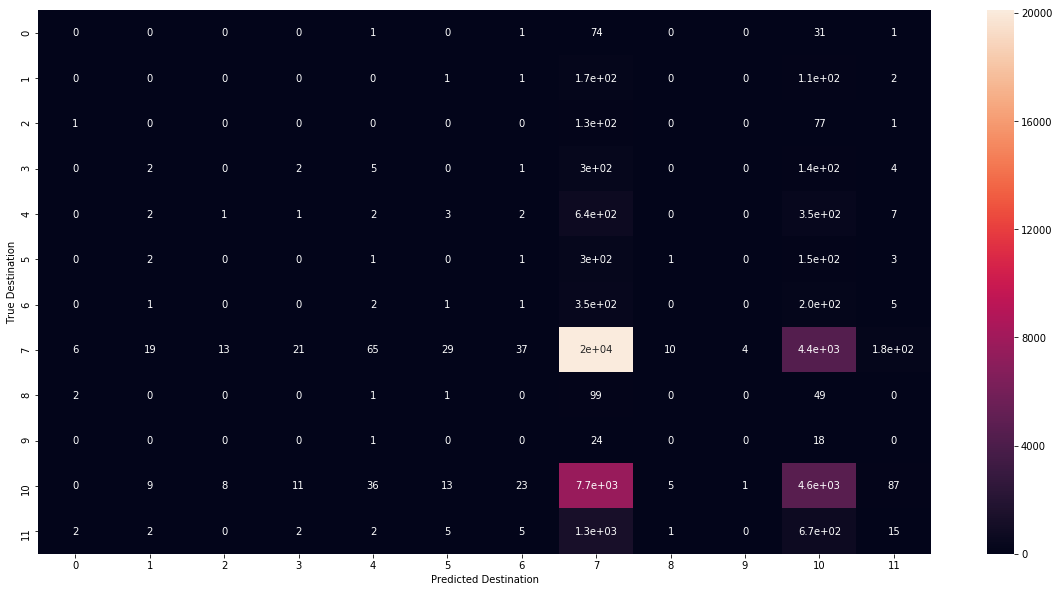

In [92]:
labels=['AU', 'CA','DE', 'ES', 'FR', 'GB','IT', 'NDF', 'NL','PT', 'US', 'other']

cm = confusion_matrix(Y_test, y_pred_test, labels)

df_ab = pd.DataFrame(cm,index = [i for i in range(0,12)], columns = [i for i in range(0,12)])


plt.figure(figsize=(20,10))
sns.heatmap(df_ab, annot=True)

plt.ylabel('True Destination')
plt.xlabel('Predicted Destination')

## <u> Predict for Test Dataset and Saving predicted destination for new user in  CSV</u>

As a final step we predict the 8 top destination countries for each new user based on the probabilities predicted from the trained models. As depicted in the summary table the Support Vector Classifier Model performed best of all the models closely followed by Random Forest.



## predicted ['id' , 'country destination'] for Decision Tree is saved in sub_dt.csv

In [93]:
y_pred_prob_1=dt.predict_proba(X_1)
id_test = X_1.reset_index()['id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 8
    arr = [clf.classes_.tolist()[k] for k in np.argsort(y_pred_prob_1[i])[::-1]] 
    cts += arr[:8]

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv(f'{my_path}/sub_dt.csv',index=False)

## predicted ['id' , 'country destination'] for Random Forest is saved in sub_rf.csv

In [94]:
y_pred_prob_1=clf.predict_proba(X_1)
id_test = X_1.reset_index()['id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 8
    arr = [clf.classes_.tolist()[k] for k in np.argsort(y_pred_prob_1[i])[::-1]] 
    cts += arr[:8]

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv(f'{my_path}/sub_rf.csv',index=False)

## predicted ['id' , 'country destination'] for Logistic Regression OVR is saved in sub_logr.csv

In [95]:
y_pred_prob_1=logr.predict_proba(X_1)
id_test = X_1.reset_index()['id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 8
    arr = [clf.classes_.tolist()[k] for k in np.argsort(y_pred_prob_1[i])[::-1]] 
    cts += arr[:8]

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv(f'{my_path}/sub_logr.csv',index=False)

In [96]:
sub.head(10)

,id,country
0,5uwns89zht,NDF
1,5uwns89zht,IT
2,5uwns89zht,PT
3,5uwns89zht,AU
4,5uwns89zht,CA
5,5uwns89zht,NL
6,5uwns89zht,DE
7,5uwns89zht,ES
8,jtl0dijy2j,NDF
9,jtl0dijy2j,IT


# <u>Comparing Different Machine Learning models for performance on Test set</u>

In [97]:
model1 = {}
value = {}

desc = {'dt':'Decision Tree','logr':'Logistic Regression OVR','rf':'Random Forest','svc':'Support Vector Classifier'}
for j in model_perf.keys():
    if desc[j[0]] not in model1.keys():
        value = {}
        value['Time(s)'] = total[j[0]][0]
        if j[0] in kag.keys():
            value['nDCG'] = kag[j[0]] 
    value[j[1]] = model_perf[j]
    model1[desc[j[0]]] = value
        
pd.DataFrame(model1).T

,Accuracy,Time(s),nDCG
Logistic Regression OVR,0.484880,173.720523,0.509247
Support Vector Classifier,0.577194,367.301897,NaN
Decision Tree,0.584503,5.215704,0.787232
Random Forest,0.579256,11.002515,0.793860


We have successfully predicted destination countries for the Airbnb’s new users!



### Trying auc and roc for multiclass classification code for OneVsRestClassifier

In [98]:
"""

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt



y = label_binarize(Y_train, Y_test, classes=[0,1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
n_classes = 12
# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()"""

'\n\nfrom sklearn.metrics import roc_curve, auc\nfrom sklearn import datasets\nfrom sklearn.multiclass import OneVsRestClassifier\nfrom sklearn.svm import LinearSVC\nfrom sklearn.preprocessing import label_binarize\nfrom sklearn.cross_validation import train_test_split\nimport matplotlib.pyplot as plt\n\n\n\ny = label_binarize(Y_train, Y_test, classes=[0,1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11])\nn_classes = 12\n# shuffle and split training and test sets\nX_train, X_test, y_train, y_test =    train_test_split(X, y, test_size=0.33, random_state=0)\n\n# classifier\nclf = OneVsRestClassifier(LinearSVC(random_state=0))\ny_score = clf.fit(X_train, y_train).decision_function(X_test)\n\n# Compute ROC curve and ROC area for each class\nfpr = dict()\ntpr = dict()\nroc_auc = dict()\nfor i in range(n_classes):\n    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])\n    roc_auc[i] = auc(fpr[i], tpr[i])\n\n# Plot of a ROC curve for a specific class\nfor i in range(n_classes):\n    plt.figure()\n 